In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from toolkit import LightCurve
import h5py

archive = h5py.File('archive.hdf5', 'r')

In [2]:
# Gather a set of all targets across all sectors: 
target_set = set()

for sector in archive: 
    for target in archive[sector]: 
        target_set.add(target)

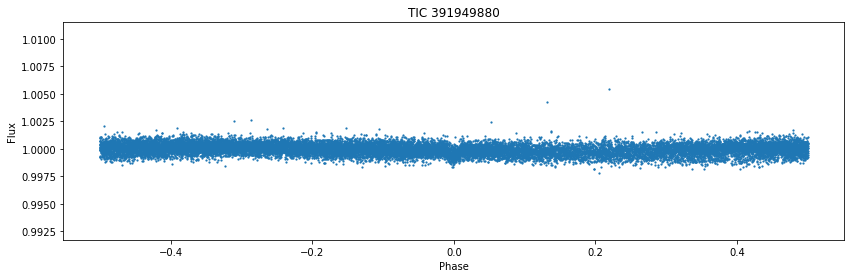

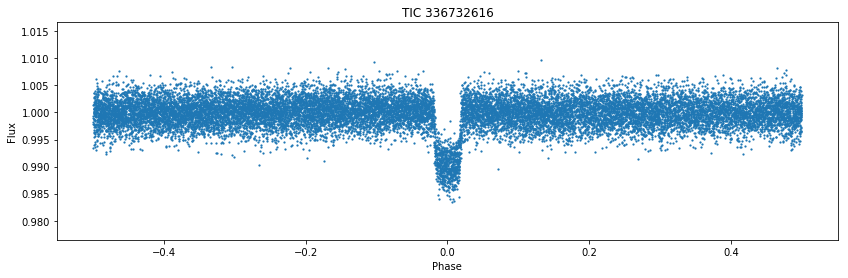

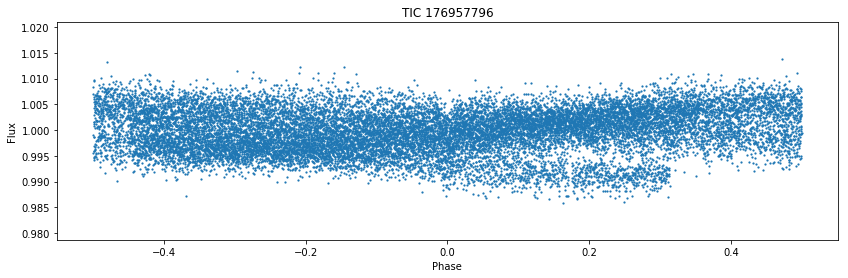

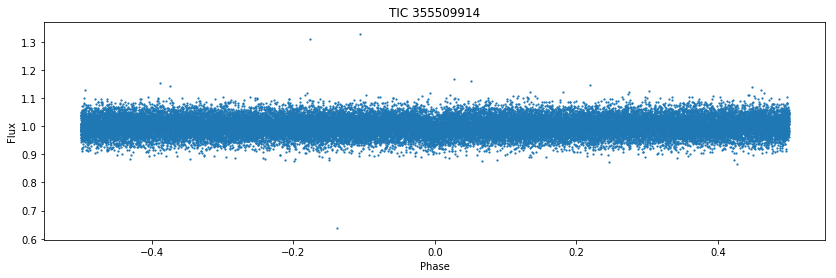

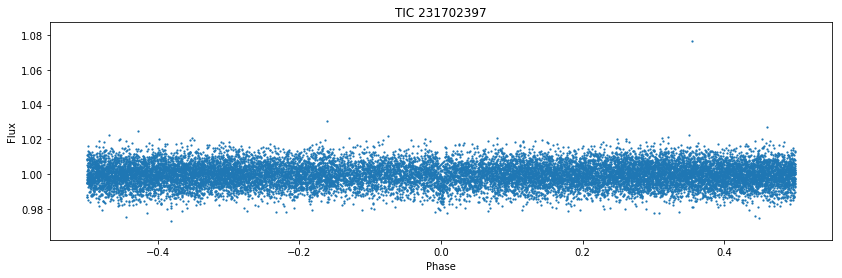

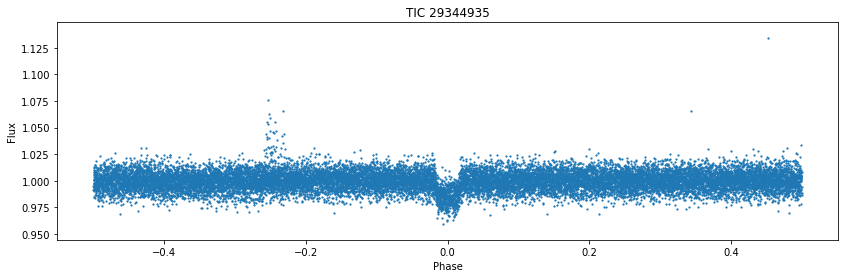

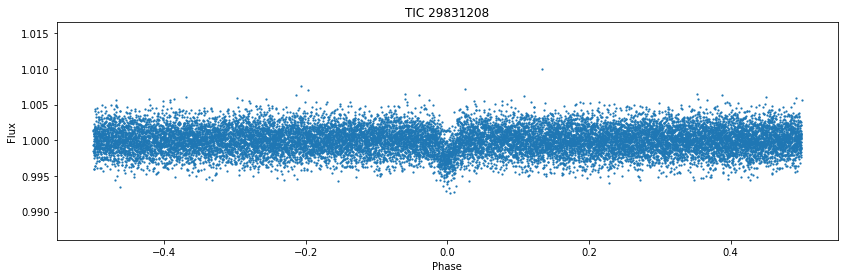

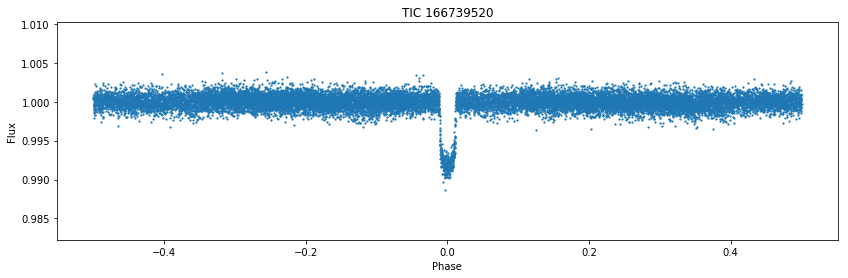

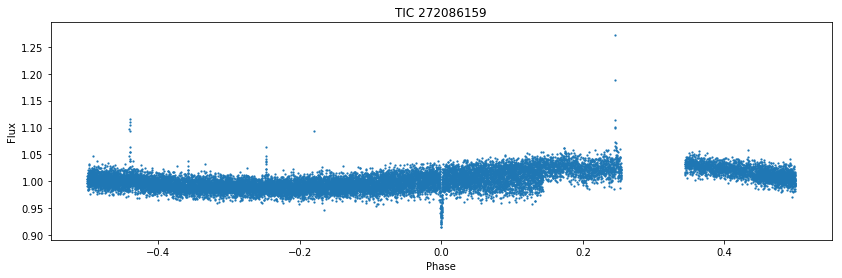

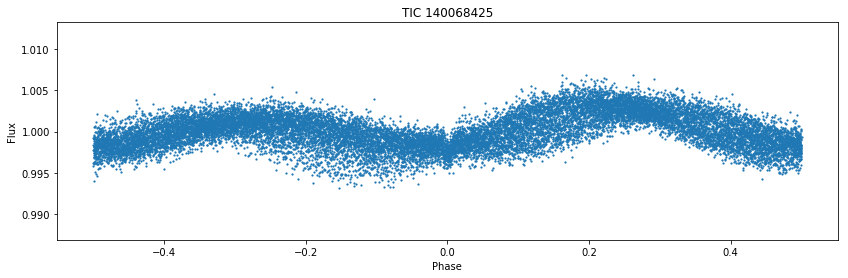

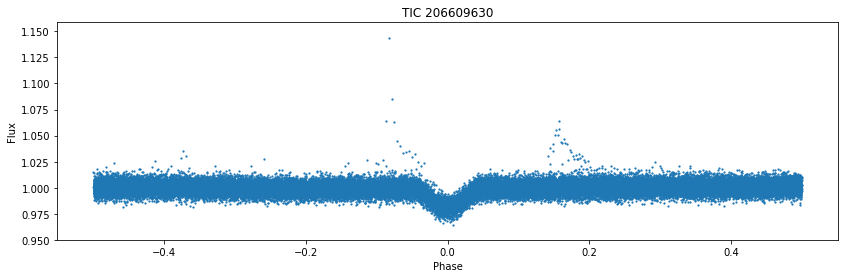

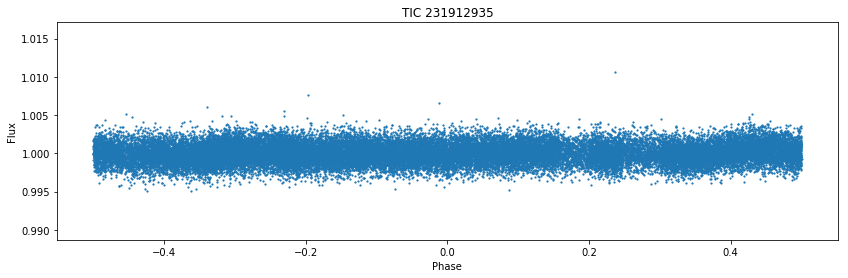

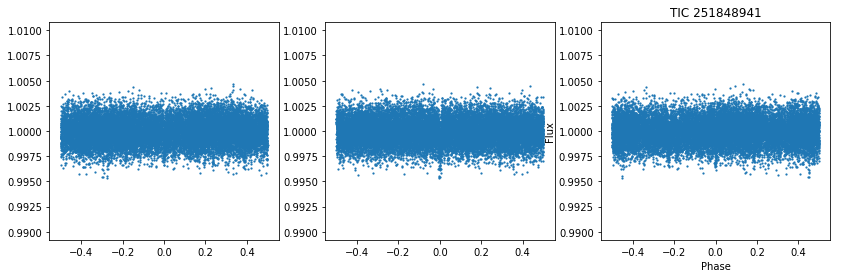

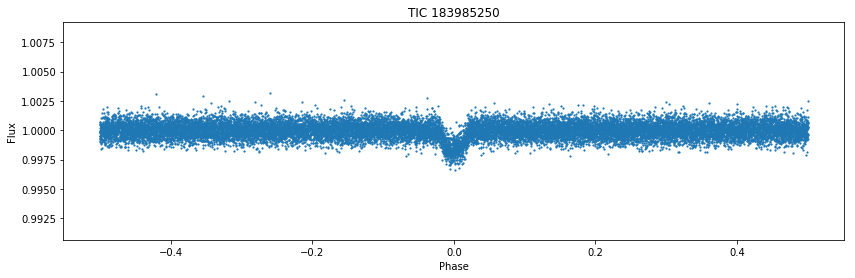

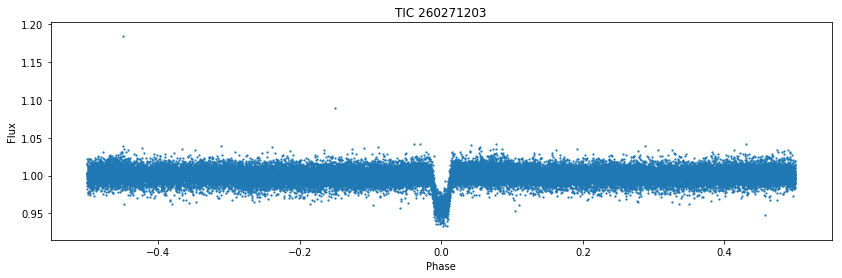

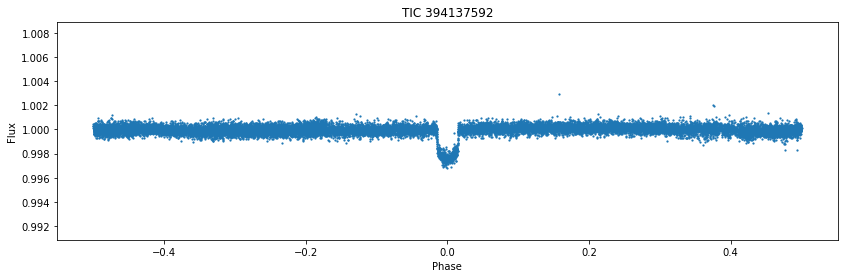

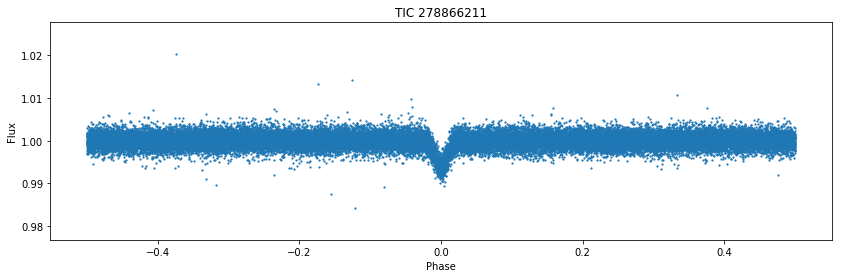

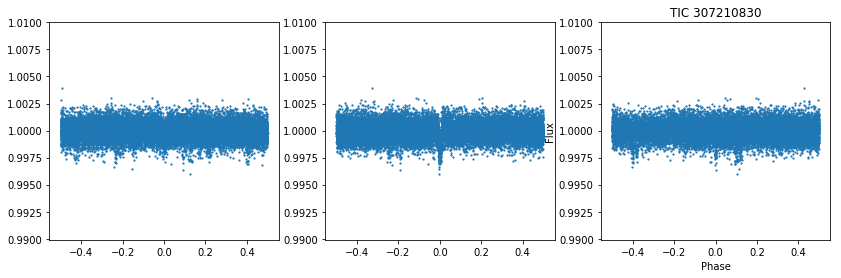

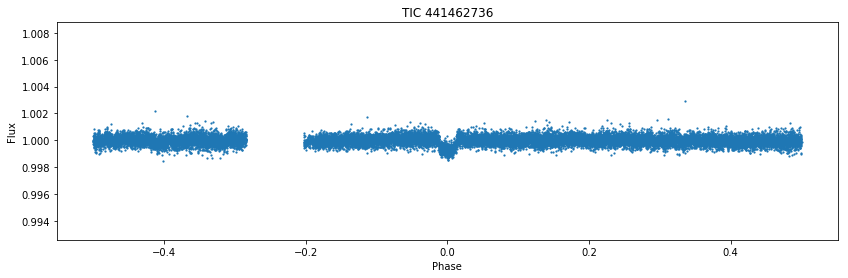

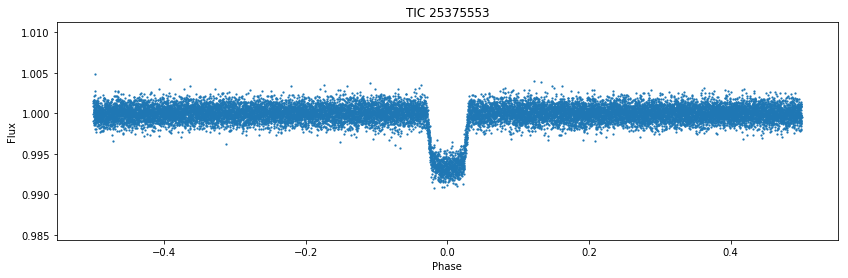

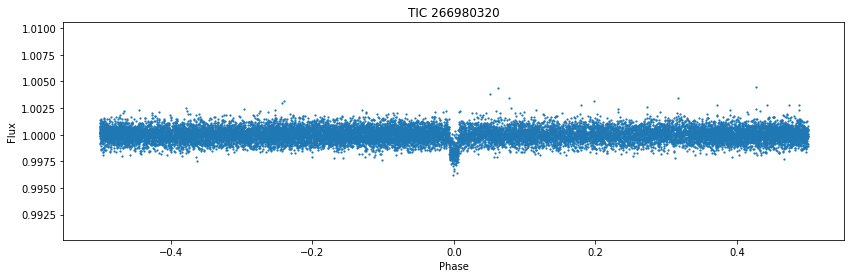

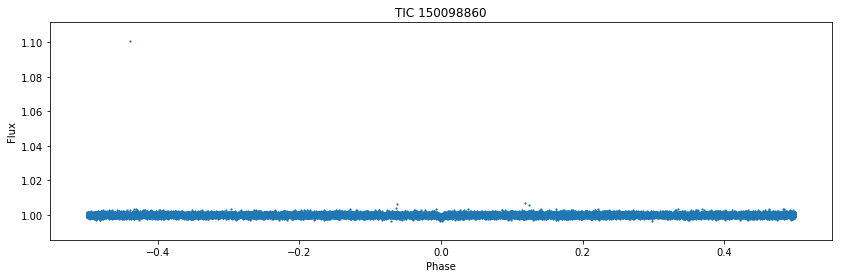

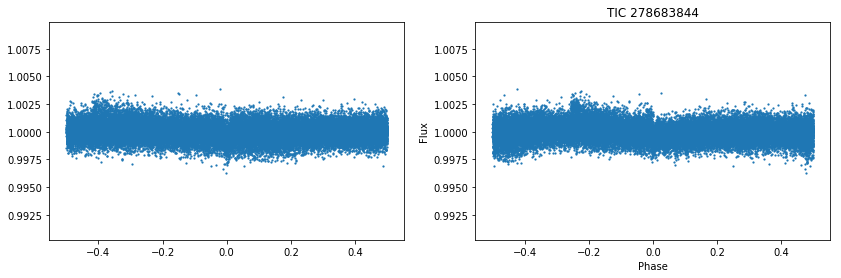

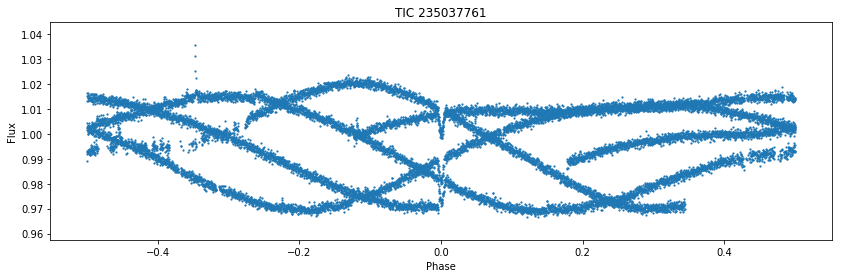

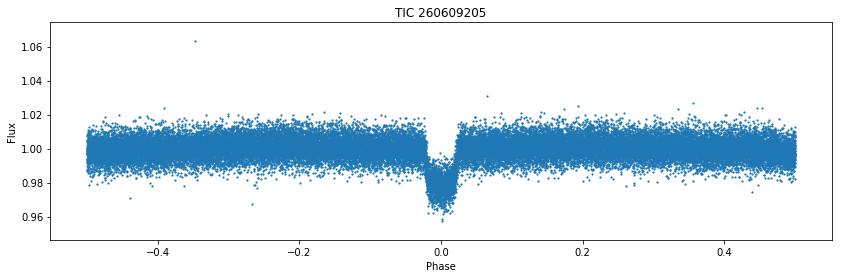

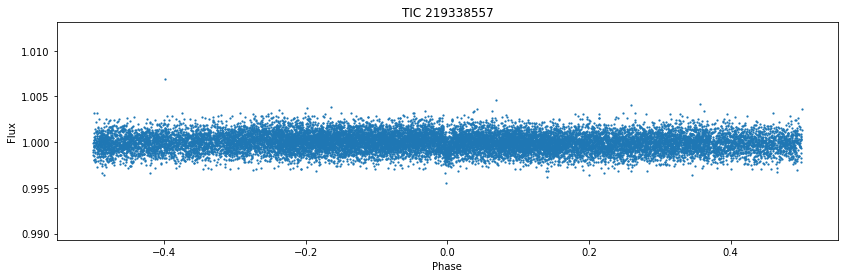

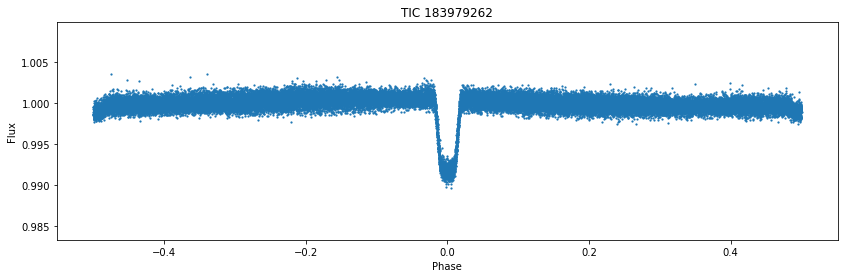

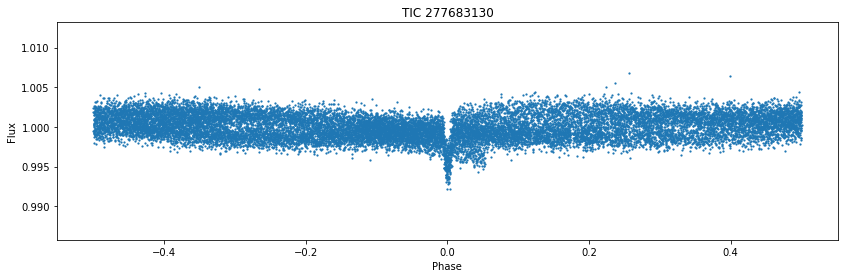

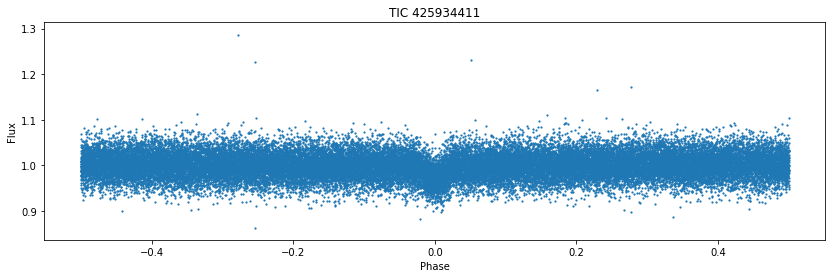

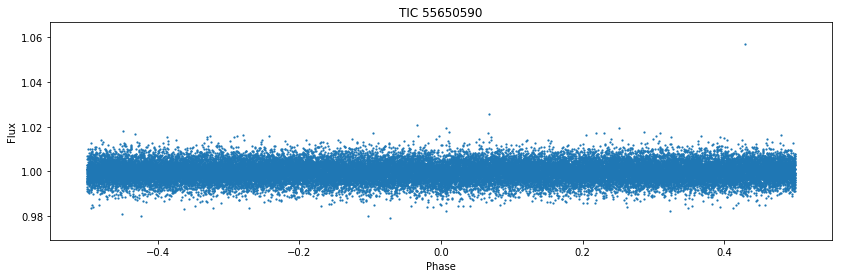

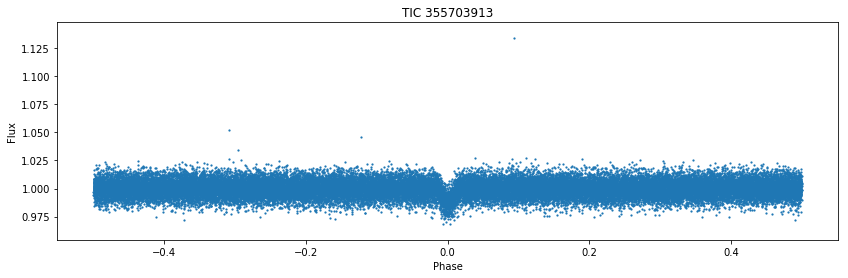

/Users/bmmorris/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in greater


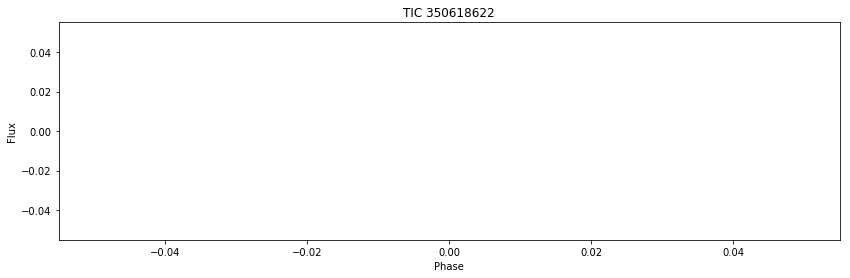

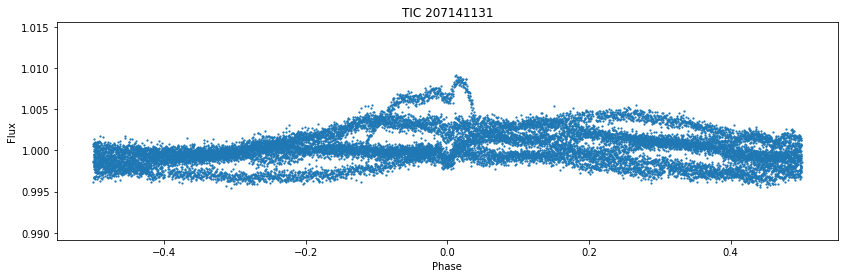

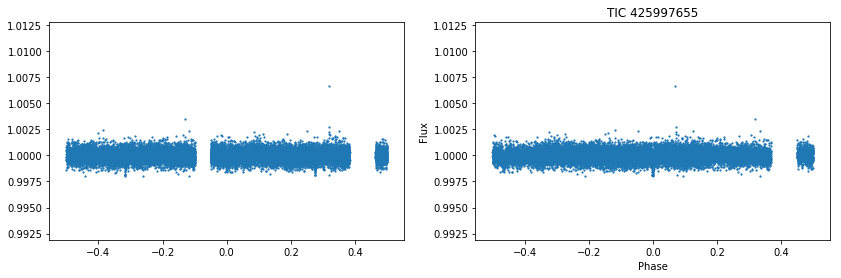

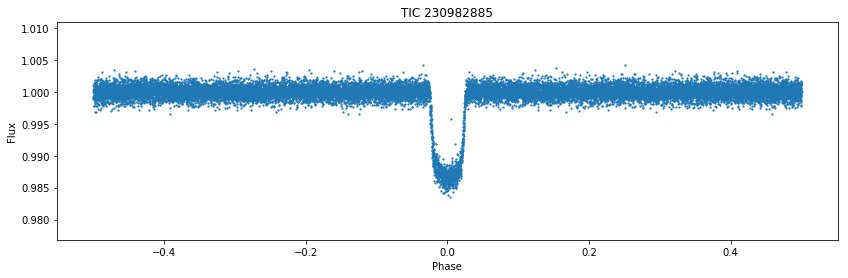

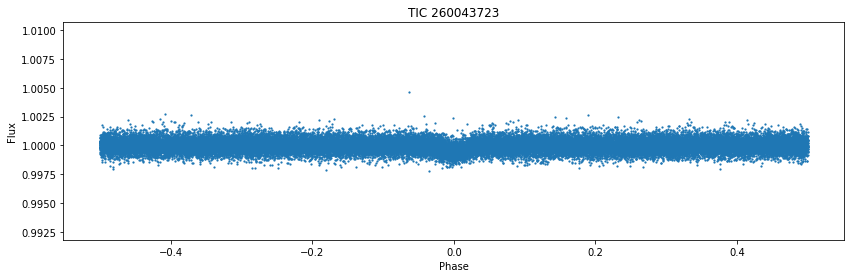

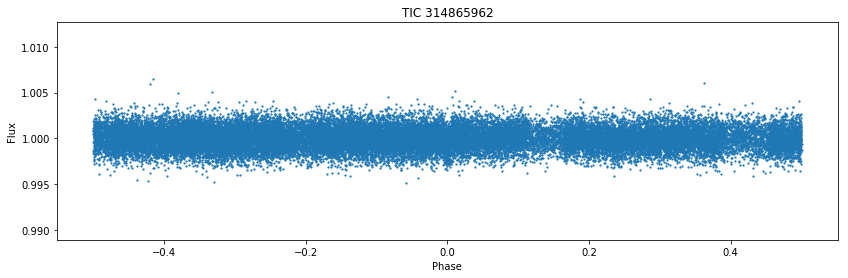

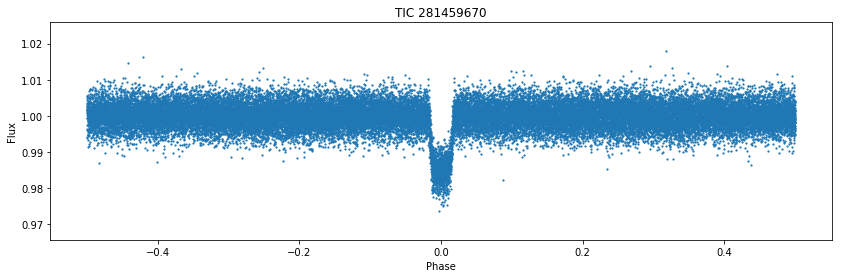

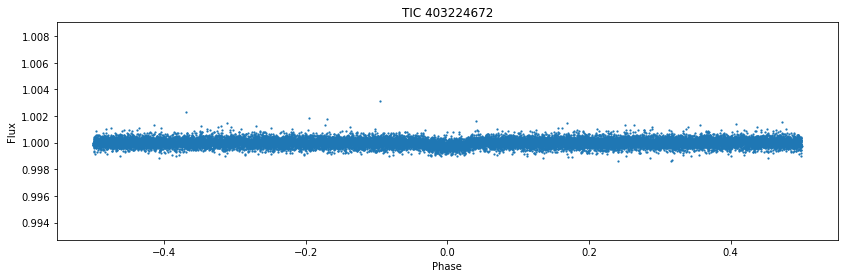

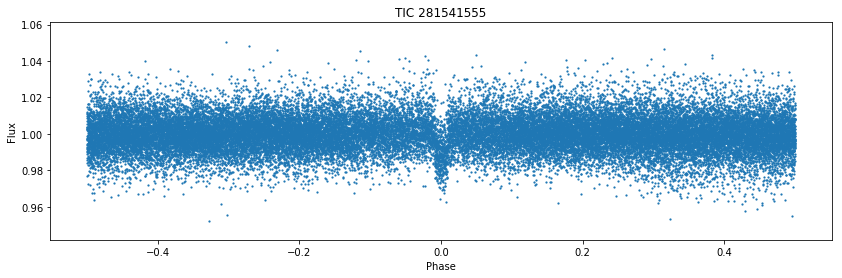

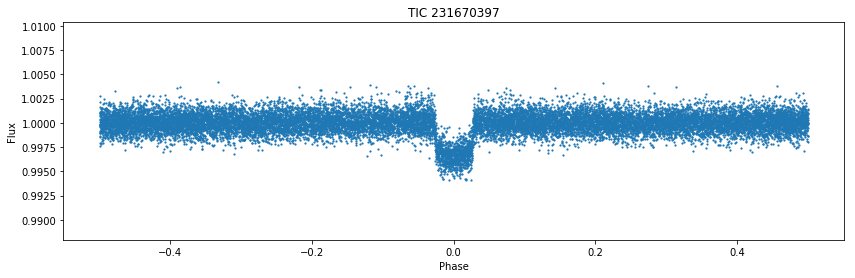

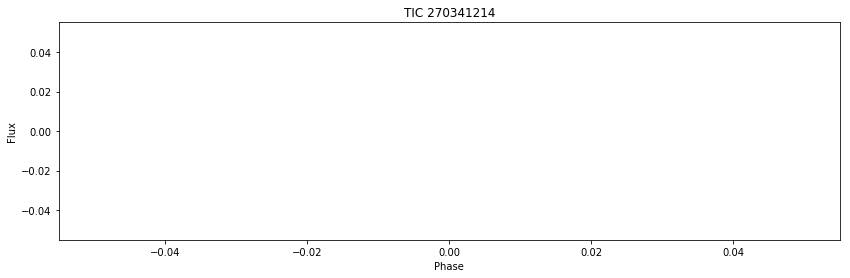

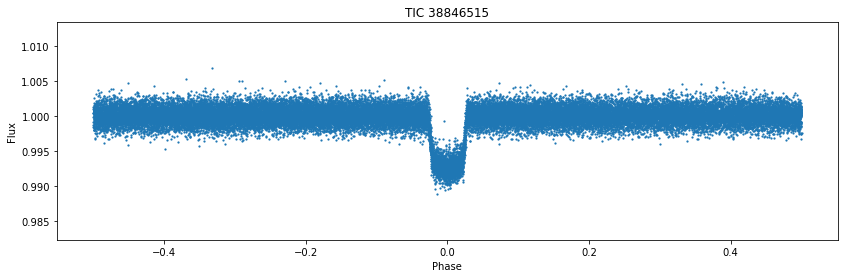

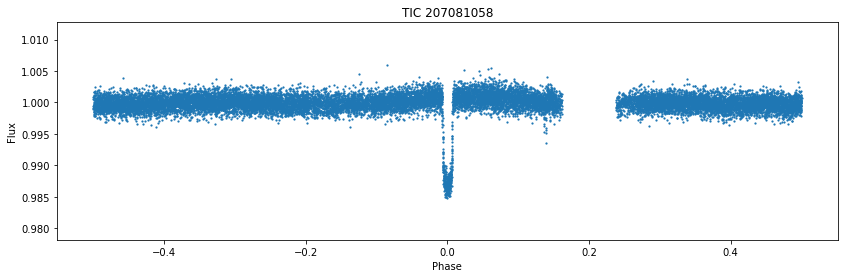

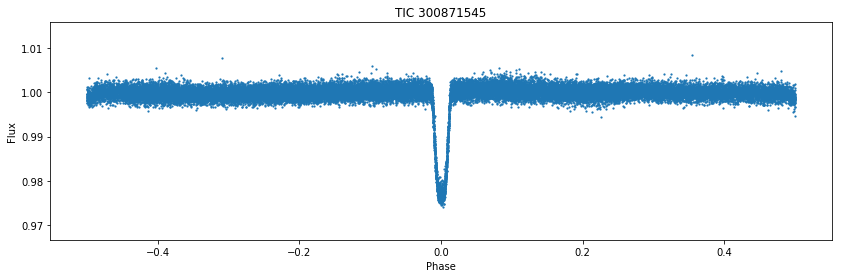

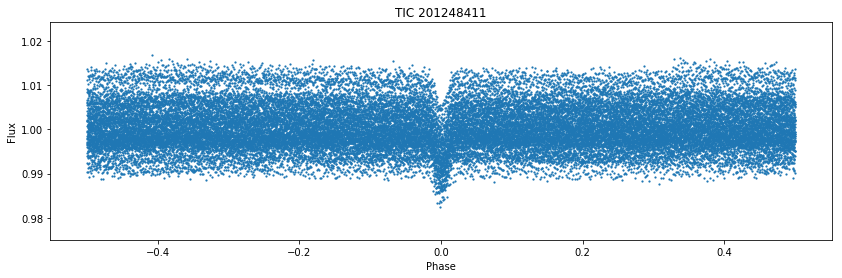

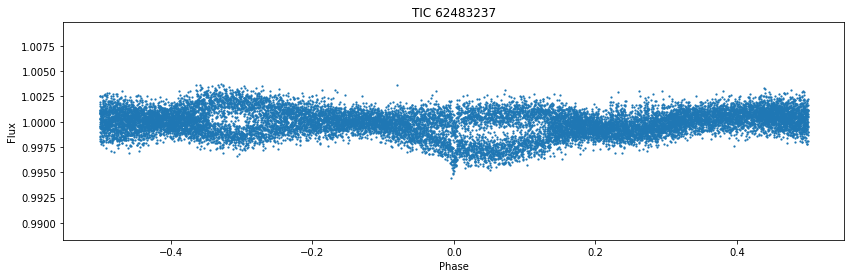

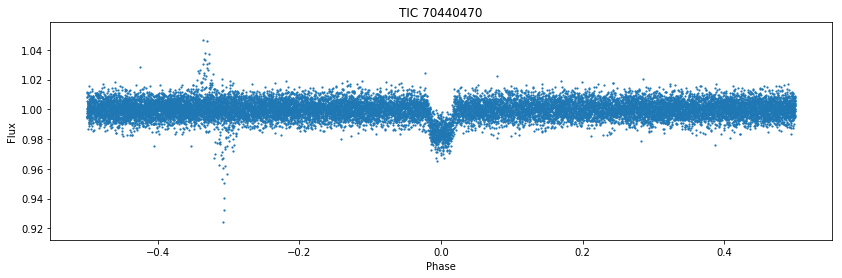

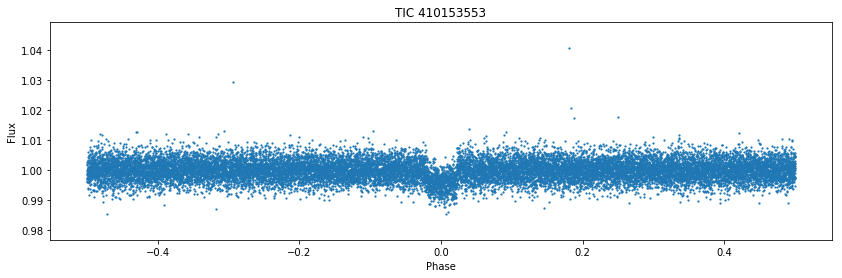

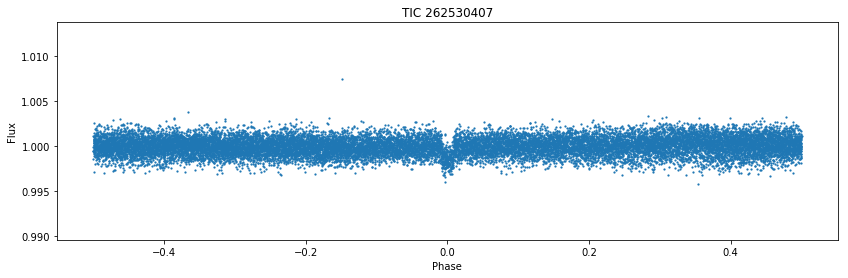

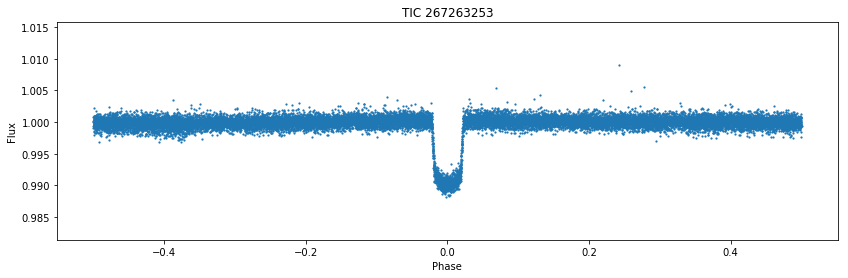

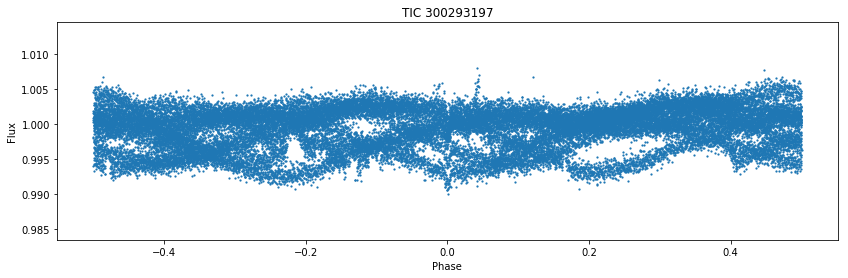

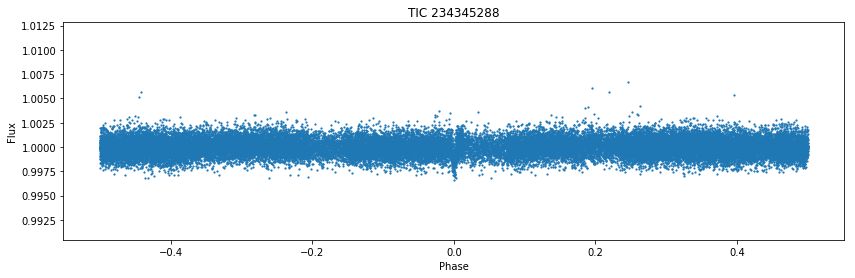

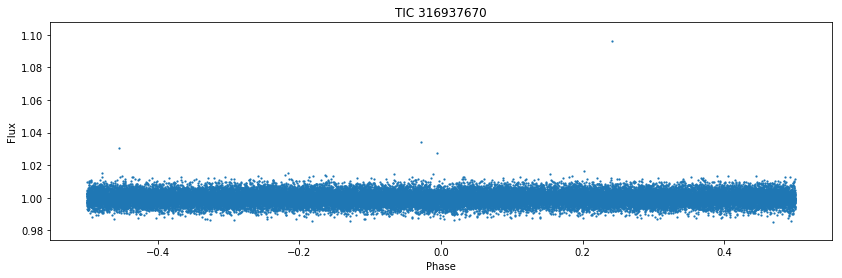

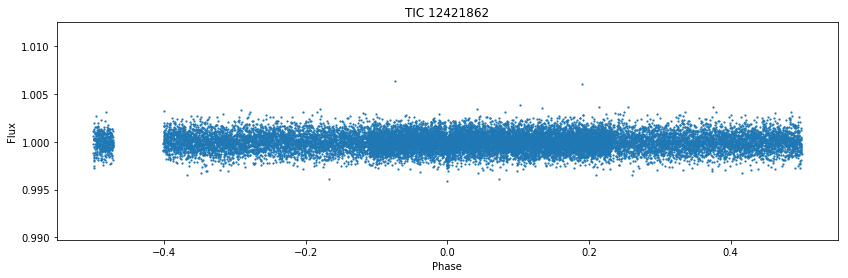

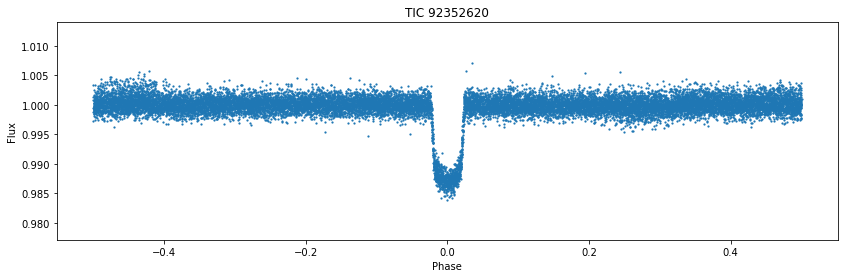

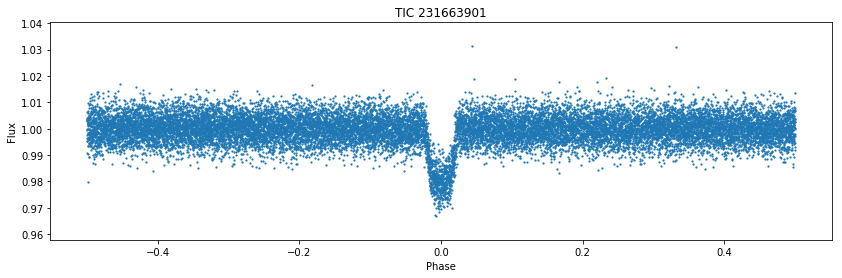

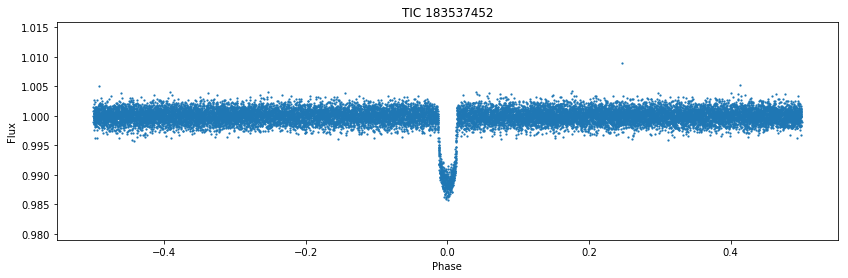

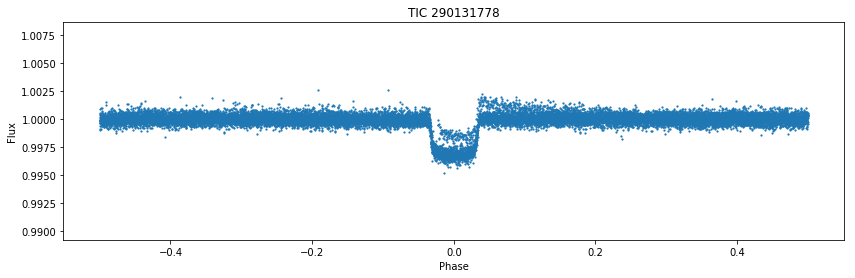

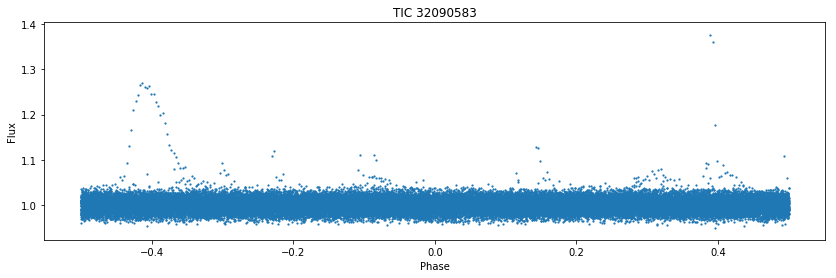

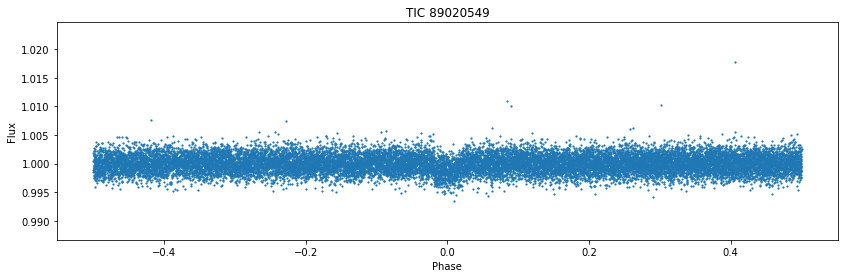

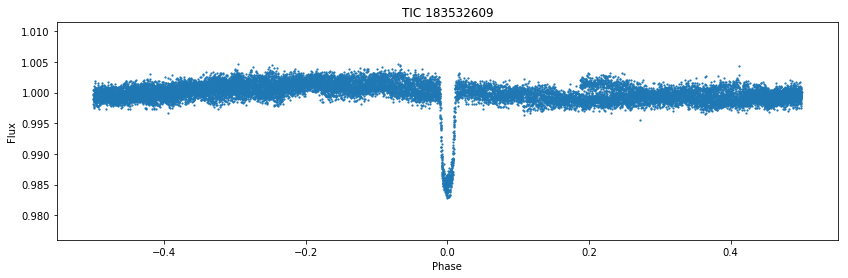

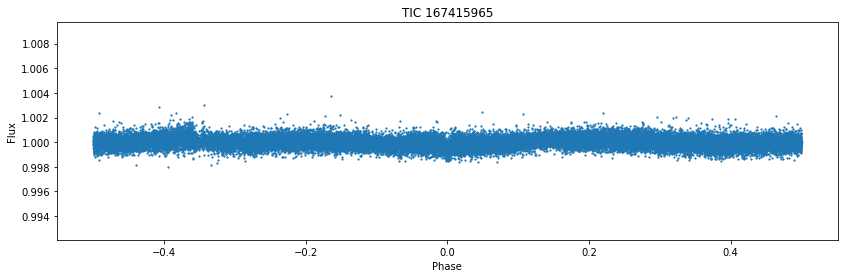

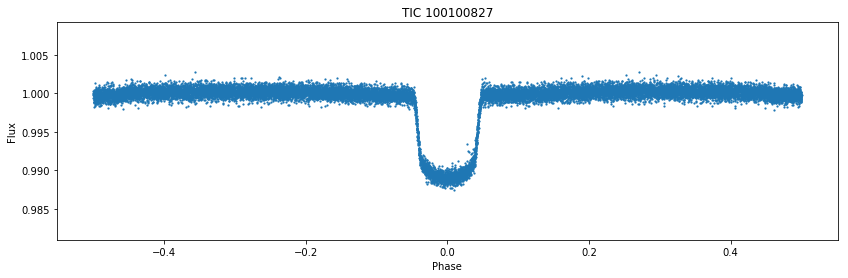

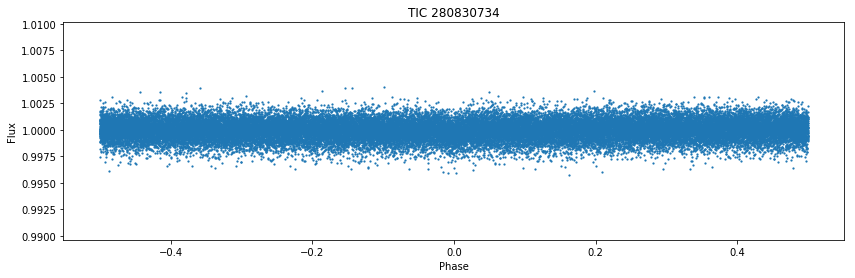

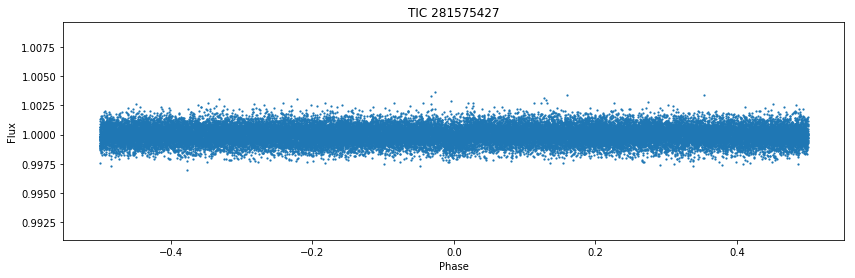

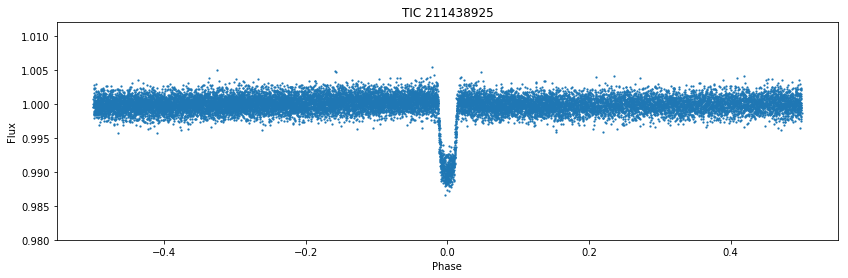

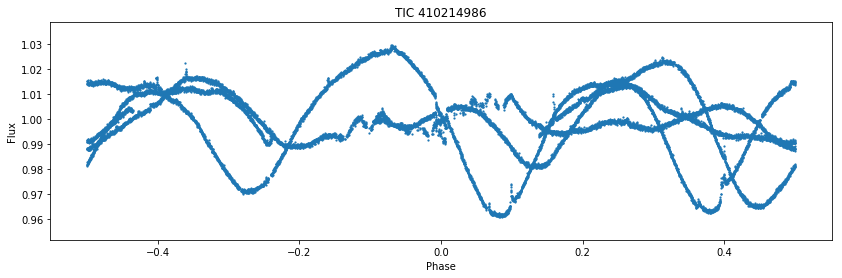

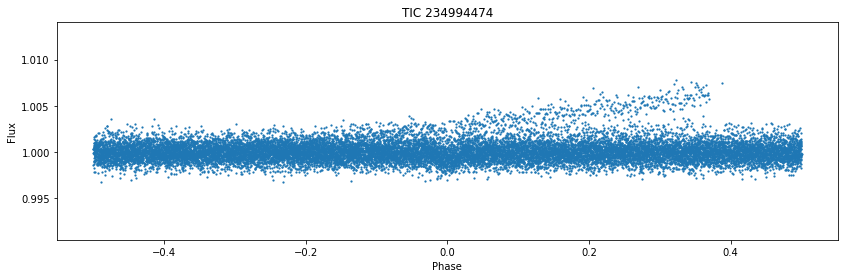

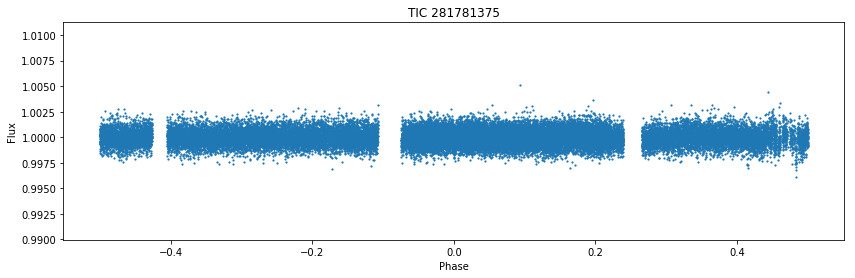

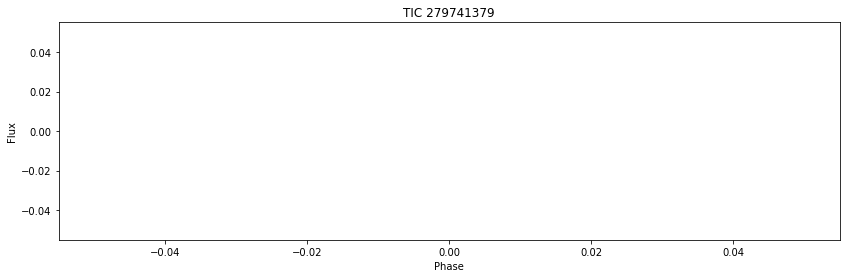

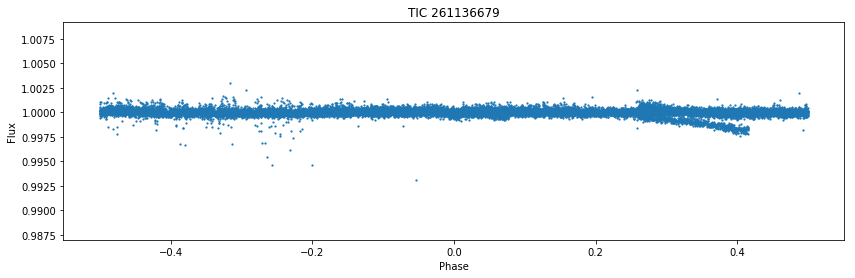

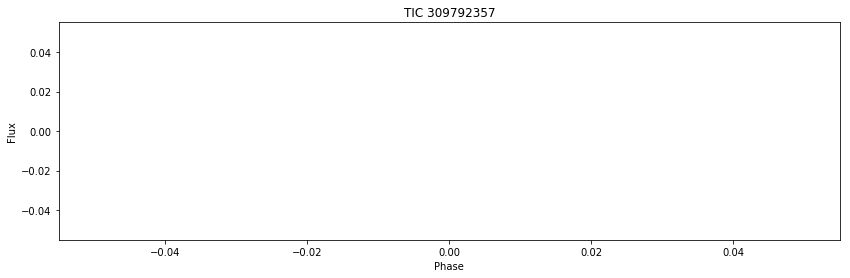

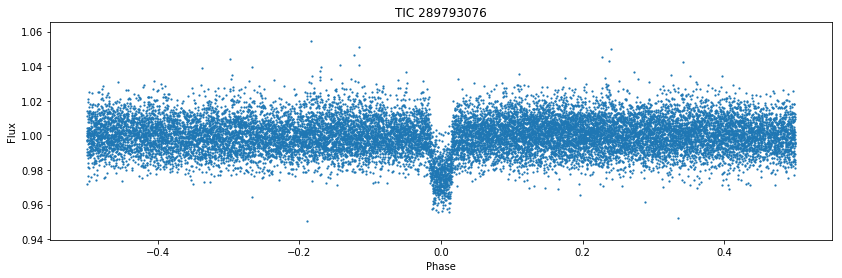

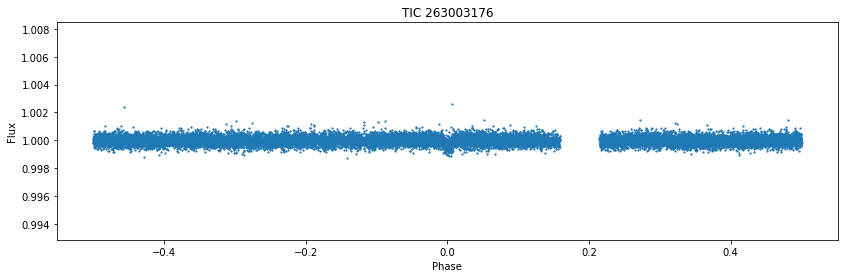

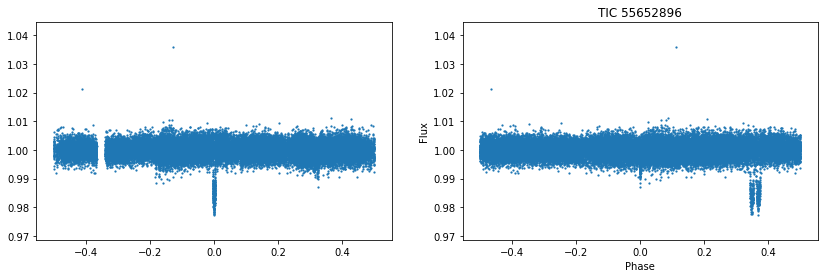

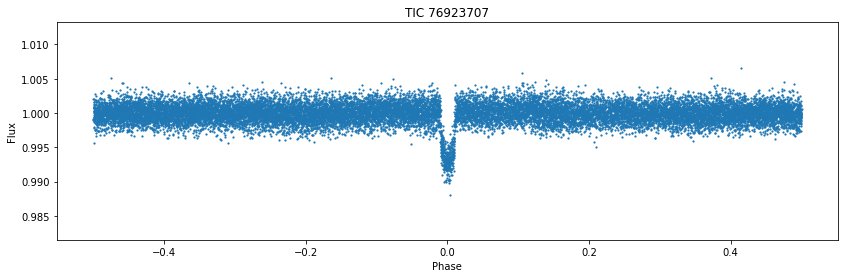

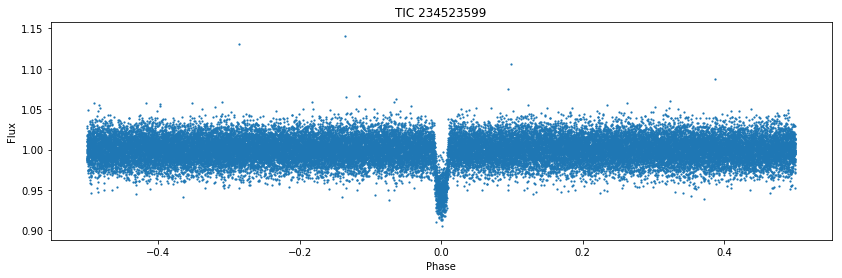

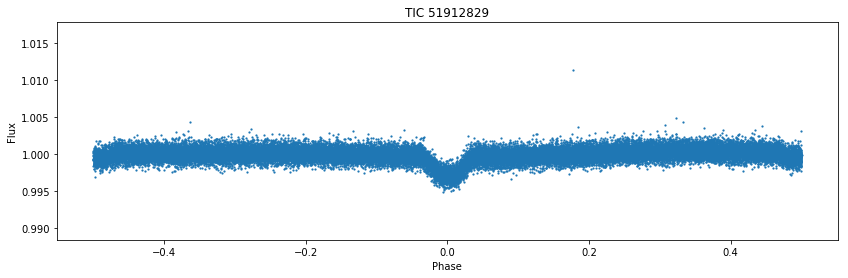

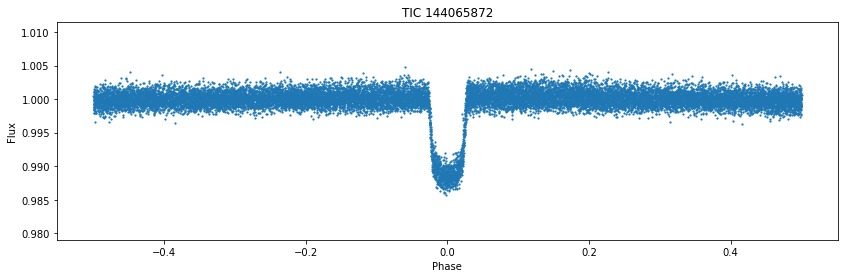

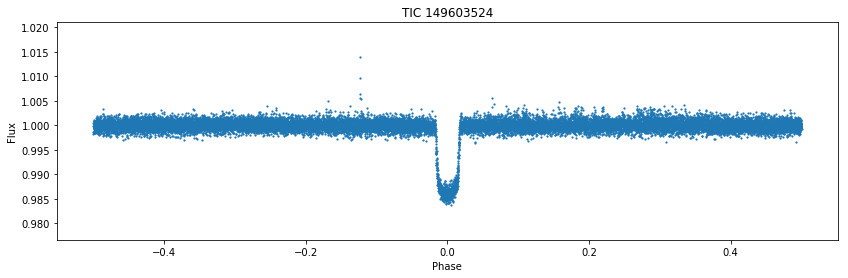

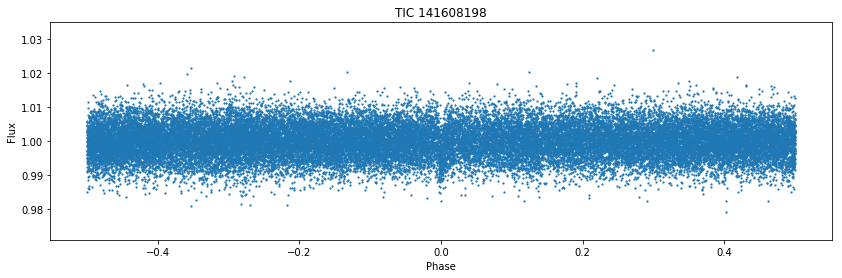

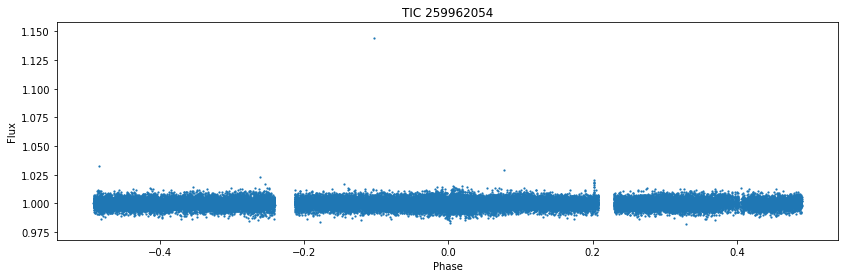

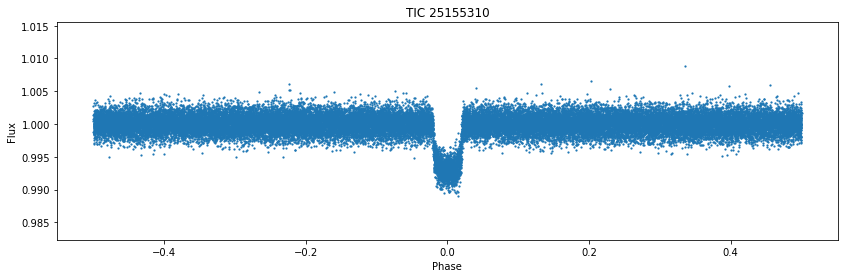

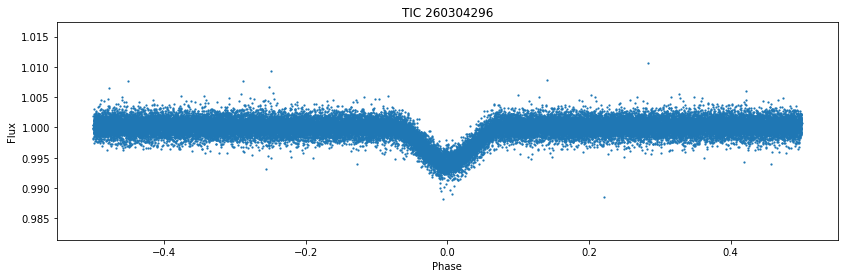

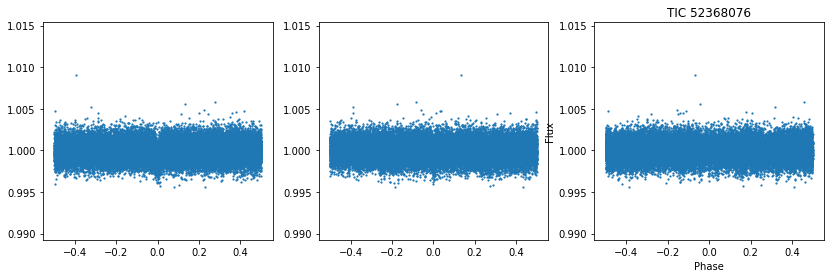

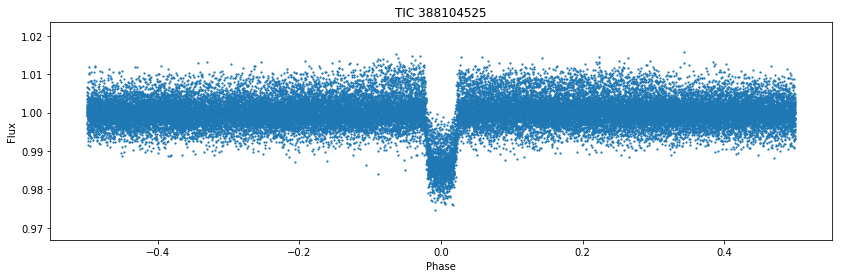

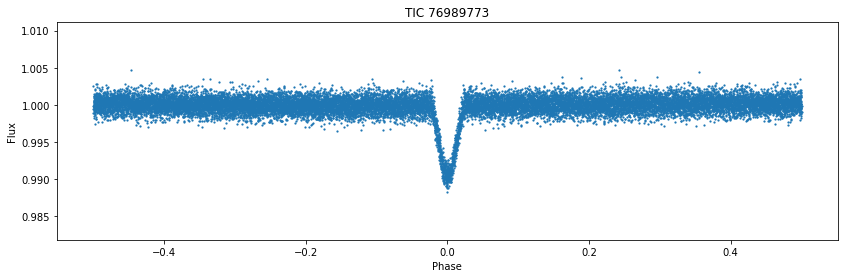

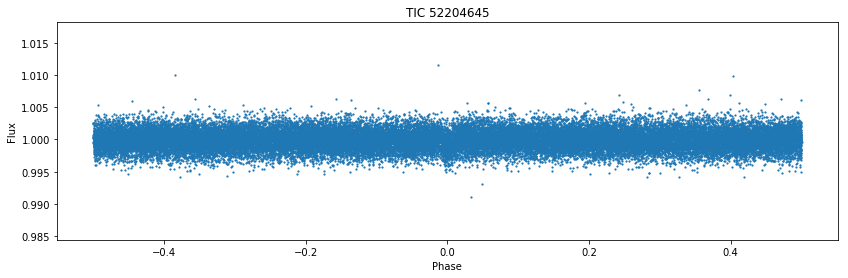

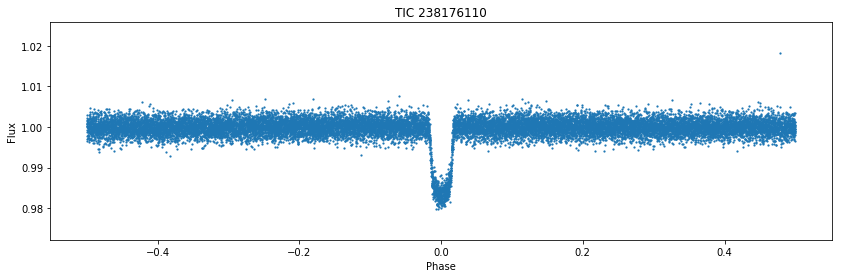

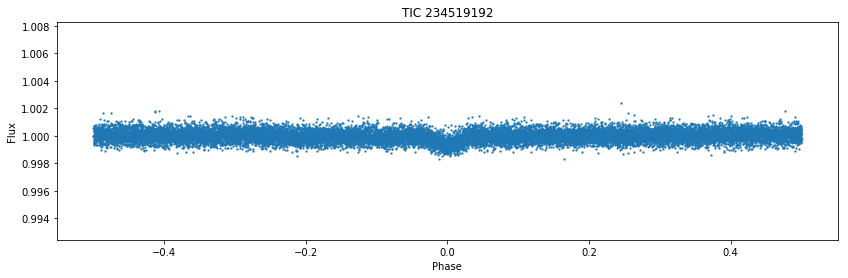

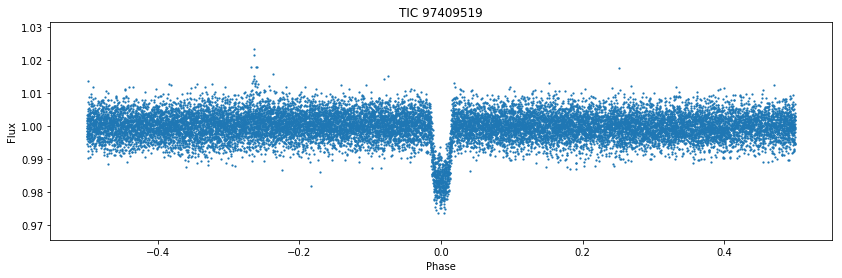

In [9]:
from astropy.time import Time
import numpy as np

plot_kwargs = dict(lw=0, marker='.', s=20)

for target in target_set: 
    times = []
    fluxes = []
    for sector in archive: 
        if target in archive[sector]: 
            data = archive[sector][target]
            times.append(data[0, :])
            fluxes.append(data[1, :]/np.median(data[1, :]))
    
    # Times are actually BJD-2457000
    lc = LightCurve(Time(np.concatenate(times) + 2457000, format='jd'), np.concatenate(fluxes), name=target)
    period = data.attrs['Period']
    epoch = data.attrs['Epoc'] + 2457000
    duration = data.attrs['Duration'] / 24  # days

    n_planets = len(period) if hasattr(period, '__len__') else 1
    
    fig, ax = plt.subplots(1, n_planets, figsize=(14, 4))
    
    if n_planets == 1: 
        phases = ((lc.times.jd - epoch) % period) / period
        phases[phases > 0.5] -= 1

        ax.scatter(phases, lc.fluxes, **plot_kwargs)
    else: 
        for i in range(n_planets):
            phases = ((lc.times.jd - epoch[i]) % period[i]) / period[i]
            phases[phases > 0.5] -= 1

            ax[i].scatter(phases, lc.fluxes, **plot_kwargs)
            
    plt.xlabel('Phase')
    plt.ylabel('Flux')
    plt.title("TIC {0}".format(target))
    plt.show()